In [1]:
# CODE BLOCK 1: LIBRARIES IMPORT
import csv
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

base_dir = Path().resolve()
if base_dir.name == 'notebooks':
    os.chdir(base_dir.parent)
    base_dir = Path().resolve()

from src.stimulus_analysis import load_and_preprocess, detect_stimuli
from src.peak_detection import identify_peak_flexion

# Data configuration

In Code Block 2, define participant's `ID` for which you want to analyse the SMT csv files.

In [ ]:
# CODE BLOCK 2: DEFINE PARTICIPANT NUMBER
ID = " "

# Define data path
data_path = base_dir / "data"
IOI = []

# Peak identification

Ensure correct detection of the peaks for each of the 5 trials of the SMT. If there are peak flexion that are not detection, or if there are detected peaks that do not correspond to peak flexion, modify the parameters until finding the optimal combination. The two parameters are:
- `peak_threshold`: minimum value to detect peak
- `min_velocity_sum`: minimum total displacement between two peaks

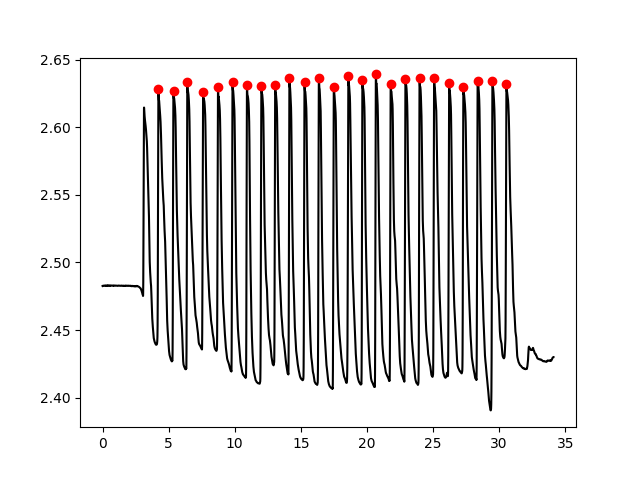

In [3]:
# Peak identification for the first trial
file_path_1 = data_path / ID / f"{ID}_Pref__1.csv"
t, mov, sound = load_and_preprocess(file_path_1)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="SMT")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, "SMT",
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_1 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 1) for IOI_val in IOI_1])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

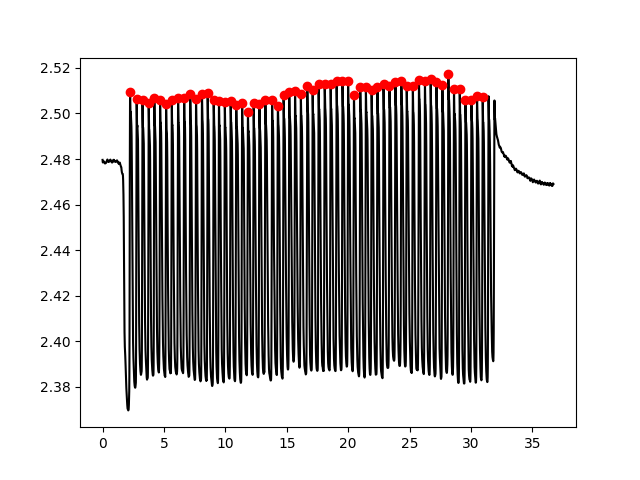

In [ ]:
# Peak identification for the second trial
file_path_2 = data_path / ID / f"{ID}_Pref__2.csv"
t, mov, sound = load_and_preprocess(file_path_2)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="SMT")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, "SMT",
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_2 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 2) for IOI_val in IOI_2])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

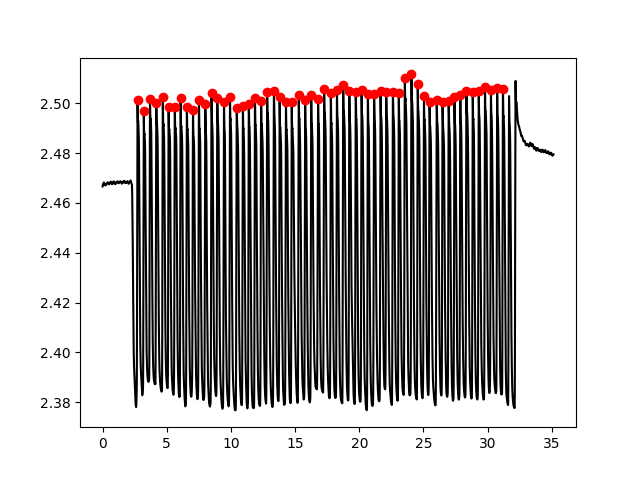

In [ ]:
# Peak identification for the third trial
file_path_3 = data_path / ID / f"{ID}_Pref__3.csv"
t, mov, sound = load_and_preprocess(file_path_3)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="SMT")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, "SMT",
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)

IOI_3 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 3) for IOI_val in IOI_3])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

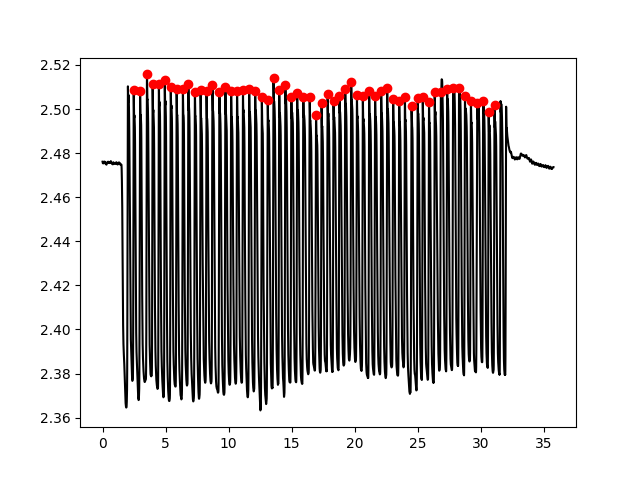

In [ ]:
# Peak identification for the third trial
file_path_4 = data_path / ID / f"{ID}_Pref__4.csv"
t, mov, sound = load_and_preprocess(file_path_4)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="SMT")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, "SMT",
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)
# First peak detected is often a false positive
peaks = peaks[1:]

IOI_4 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 4) for IOI_val in IOI_4])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

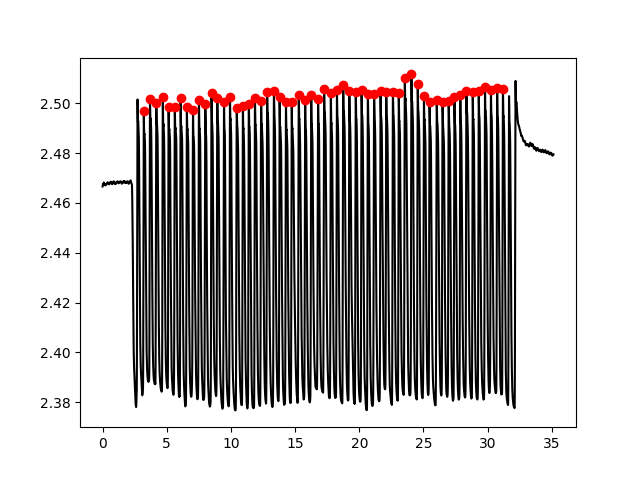

In [ ]:
# Peak identification for the third trial
file_path_5 = data_path / ID / f"{ID}_Pref__5.csv"
t, mov, sound = load_and_preprocess(file_path_3)
stim_onset, stim_times, plateaus, frequencies, task_onset, task_offset = detect_stimuli(sound, task="SMT")

# PARAMETERS FOR PEAK DETECTION
# =============================
peak_threshold = 50  # Default: 50
min_velocity_sum = 60  # Default: 60
# =============================
peaks = identify_peak_flexion(
    mov, stim_onset, plateaus, "SMT",
    peak_threshold=peak_threshold, min_velocity_sum=min_velocity_sum
)
# First peak detected is often a false positive
peaks = peaks[1:]

IOI_5 = np.diff(peaks)/5000
IOI.extend([(IOI_val, 5) for IOI_val in IOI_5])

plt.figure()
plt.plot(t, mov, "k")
plt.plot(t[peaks], mov[peaks], "ro")

# Calculate SMT

A first step is to ensure that the spontaneous motor tempo is equivalent across trials. To do that, we will verify with a boxplot, representing the periods between two consecutive taps for each trial.

(0.0, 1.0)

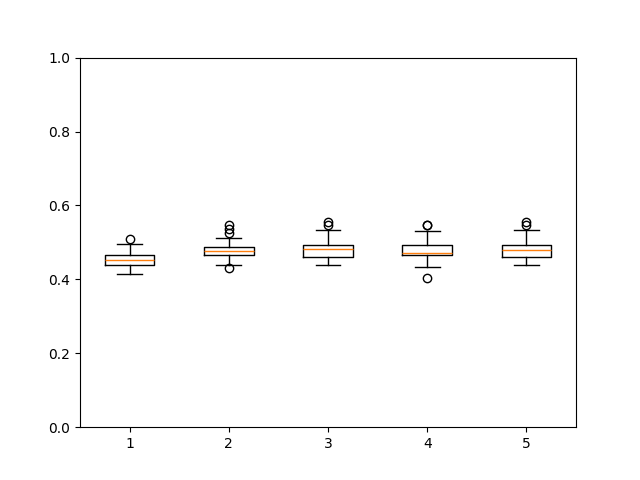

In [16]:
# Make a boxplot of the IOI values per trial
plt.figure()
plt.boxplot([IOI_1, IOI_2, IOI_3, IOI_4, IOI_5])
plt.ylim([0, 1])


Another way to ensure consistency across trials is to compute the coefficient of variation (CV) and the mean frequency of tapping along with its standard deviation. Verify that the mean values are close to one another.

In [17]:
# Calculate the coefficient of variation for the IOI values
IOI = np.array(IOI)
IOI[:,0] = 1/IOI[:,0]
CV = np.std(IOI[:, 0]) / np.mean(IOI[:, 0]) * 100
print(f"CV all IOIs: {round(CV,2)}%")

# Calculate mean and sd
IOI_mean = np.array([np.mean(IOI[IOI[:, 1] == i, 0]) for i in range(1, 6)])
IOI_sd = np.array([np.std(IOI[IOI[:, 1] == i, 0]) for i in range(1, 6)])

CV_mean = np.std(IOI_mean) / np.mean(IOI_mean) * 100
print(f"CV trials: {round(CV_mean,2)}%")

print("")
print("|       1       |       2       |       3       |       4       |       5       |")
print("|===============|===============|===============|===============|===============|")
print(
    f"| {round(IOI_mean[0], 2)} (± {round(IOI_sd[0], 2)}) | {round(IOI_mean[1], 2)} (± {round(IOI_sd[1], 2)}) | " 
    f"{round(IOI_mean[2], 2)} (± {round(IOI_sd[2], 2)}) | {round(IOI_mean[3], 2)} (± {round(IOI_sd[3], 2)}) | "
    f"{round(IOI_mean[4], 2)} (± {round(IOI_sd[4], 2)}) |"
)


CV all IOIs: 5.49%
CV trials: 2.35%

|       1       |       2       |       3       |       4       |       5       |
|===============|===============|===============|===============|===============|
| 2.21 (± 0.1) | 2.09 (± 0.09) | 2.08 (± 0.11) | 2.1 (± 0.11) | 2.08 (± 0.11) |


Now that we have verified that the participant was consistent across trials, we can calculate the SMT as the average of the mean frequency across trials.

In [ ]:
# Print the global mean frequency
mean_freq = round(np.mean(IOI_mean), 2)
print(f"Mean frequency: {mean_freq} Hz")

# Print the slow condition and fast condition (± 20%)
print(f"Slow: {round(mean_freq * 0.8, 2)} Hz   |   Fast: {round(mean_freq * 1.2, 2)} Hz")

Mean frequency: 2.113 Hz
Slow: 1.69 Hz   |   Fast: 2.54 Hz
